In [12]:
# Enable interactive plot
%matplotlib notebook

In [13]:
import copy

from matplotlib import pyplot as plt
from matplotlib import animation

nums = []

image_sequence = []

In [14]:
def process(tup, nums, basin, current_basin):

    (i, j) = tup
    # check that you're within the bounds before attempting to access any elements
    if 0 <= j < len(nums[0]) and 0 <= i < len(nums):
        
        # check if you've been here before
        if basin[i][j] != 0:
            return

        # check if the current position is a basin wall
        if nums[i][j] == 9:
            basin[i][j] = -1
            image_sequence.append(copy.deepcopy(basin))
            return

        # you're still in the basin, set the value to the current basin 
        basin[i][j] = current_basin
        image_sequence.append(copy.deepcopy(basin))

        # process all of this position's neighbors
        neighbors = [(i, j+1), (i-1, j), (i, j-1), (i+1, j)]
        [process(neighbor, nums, basin, current_basin) for neighbor in neighbors]

In [15]:
with open('test.in','r') as f:
    for line in f.readlines():
        nums.append([int(x) for x in line.strip()])

In [16]:
## part 1 ##

mins = []

for i in range(len(nums)):
    for j in range(len(nums[0])):
        if i > 0 and nums[i][j] >= nums[i-1][j]:
            continue
        if i < len(nums) - 1 and nums[i][j] >= nums[i+1][j]:
            continue
        if j > 0 and nums[i][j] >= nums[i][j-1]:
            continue
        if j < len(nums[0]) - 1 and nums[i][j] >= nums[i][j+1]:
            continue
        mins.append(nums[i][j])

print(sum(mins) + len(mins))

15


In [17]:
## part 2 ##

basin = [[0] * len(nums[0]) for _ in range(len(nums))]
image_sequence.append(copy.deepcopy(basin))

# track the current basin number
current_basin = 0

# start upper left 
for i in range(len(nums)):
    for j in range(len(nums[0])):
        if basin[i][j] == 0:
            # this spot is currently unmarked
            if nums[i][j] == 9:
                # if this is a 9, it's not in a basin
                basin [i][j] = -1
                image_sequence.append(copy.deepcopy(basin))
            else:
                # this is the first cell in a new basin
                current_basin += 1

                # mark this cell
                basin[i][j] = current_basin
                image_sequence.append(copy.deepcopy(basin))

                # then recursively map the entire basin
                neighbors = [(i, j+1), (i-1, j), (i, j-1), (i+1, j)]
                [process(neighbor, nums, basin, current_basin) for neighbor in neighbors]

In [18]:
basin_counts = [0] * (current_basin + 1)

for x_i in range(len(basin)):
    for x_j in range(len(basin[0])):
        if basin[x_i][x_j] != -1:
            basin_counts[basin[x_i][x_j]] += 1

basin_counts.sort(reverse=True)

print(basin_counts[0] * basin_counts[1] * basin_counts[2])

1134


<IPython.core.display.Javascript object>


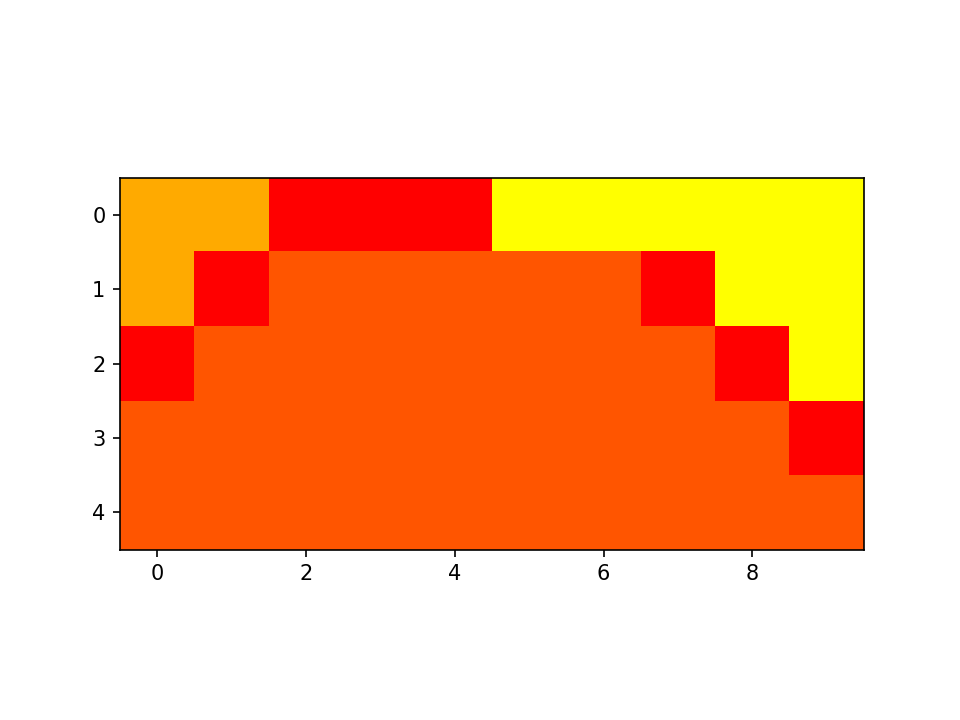

In [20]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
plt.imshow(image_sequence[0], cmap='autumn')

# initialization function: plot the background of each frame
def init():
    plt.imshow(image_sequence[0], cmap='autumn')

# animation function of dataframes' list
def animate(i):
    plt.imshow(image_sequence[i], cmap='autumn')    

# call the animator, animate every 5 ms
# set number of frames to the length of your list of dataframes
anim = animation.FuncAnimation(fig, animate, frames=len(image_sequence), init_func=init, interval=50, blit=False)

plt.show()